# **Øvelse 1**

In [277]:
#Pakker
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [278]:
#Filer
files = ["Øvelse_1_filer/10V/tek0000CH1.csv",
         "Øvelse_1_filer/10V/tek0001CH1.csv",
         "Øvelse_1_filer/10V/tek0002CH1.csv",
         "Øvelse_1_filer/10V/tek0003CH1.csv",
         "Øvelse_1_filer/10V/tek0004CH1.csv",
         "Øvelse_1_filer/10V/tek0005CH1.csv",
         "Øvelse_1_filer/10V/tek0006CH1.csv",
         "Øvelse_1_filer/10V/tek0007CH1.csv"]


In [279]:
#Læs filen som en variabel
All_files = []
for file in files:
    try:
        load_file = pd.read_csv(file, skiprows=21, usecols=[1])
        All_files.append(load_file)
    except Exception as e:
        print(f"Error reading file {file}: {e}")


In [280]:
#Gennemsnit
Median = []
for volt_values in All_files:
    Median_Vol = np.sum(volt_values ** 2) 
    RMS_value = math.sqrt(Median_Vol / len(volt_values))
    Median.append(RMS_value)
print(Median)

[10.087979003606408, 9.082302631503254, 8.083962334429215, 6.086550882479868, 5.128717127449489, 4.119281328191437, 3.1271632614081146, 2.106468043924759]


C:\Users\Matti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Matti\AppData\Local\Temp\ipykernel_17552\2383244344.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  RMS_value = math.sqrt(Median_Vol / len(volt_values))


In [281]:
#Power og Multimeter
Power = [10,9,8,7,6,5,4,3,2,1]
Multi = [10,9,8,7,6,5,4,3,2,1]
Median.insert(9,1.10)
Median.insert(3,7.07)

#Arrays
Power = np.array(Power)
Multi = np.array(Multi)



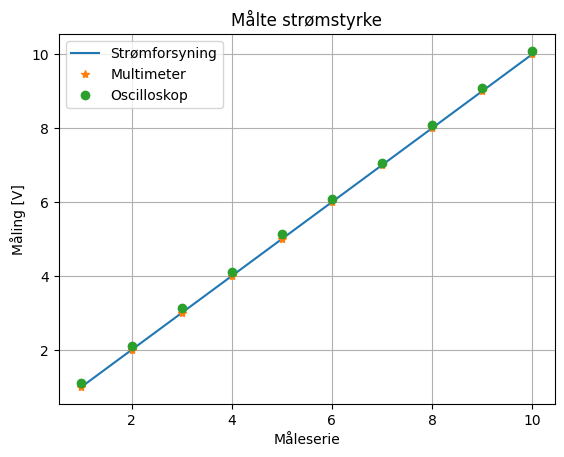

In [282]:
# Plot
plt.figure()
plt.plot([10,9,8,7,6,5,4,3,2,1], Power, label="Strømforsyning", marker='', linestyle='-')
plt.plot([10,9,8,7,6,5,4,3,2,1], Multi, label="Multimeter", marker='*', linestyle='')
plt.plot([10,9,8,7,6,5,4,3,2,1], Median, label="Oscilloskop", marker='o', linestyle='')
plt.xlabel('Måleserie')
plt.ylabel('Måling [V]')
plt.title('Målte strømstyrke')
plt.grid(True)
plt.legend()
plt.show()

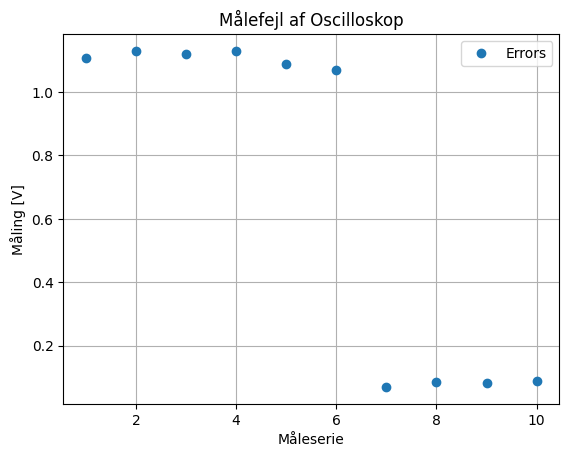

In [283]:
# Målefejl
Exp = [10,9,8,7,6,5,4,3,2,1]
Errors = []
for i in range(10):
    Error = Median[i] - Exp[i]
    Errors.append(Error)
Errors = np.array(Errors)
plt.figure()
plt.plot([10,9,8,7,6,5,4,3,2,1], Errors, label="Errors", marker='o', linestyle='')
plt.xlabel('Måleserie')
plt.ylabel('Måling [V]')
plt.title('Målefejl af Oscilloskop')
plt.grid(True)
plt.legend()
plt.show()